In [ ]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import skfuzzy.membership as mf
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=79e494d9387a0e00a262597d7838fd160e381f1a73fd708088e24db06209d8e3
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Range pilihan Input

x_age = np.arange(0, 101, 1)
x_bloodPressure = np.arange(0, 221, 1)
x_cholesterol = np.arange(100, 251, 1)
x_bloodSugar = np.arange(0, 121, 1)
x_hdl = np.arange(0, 71, 1)
x_ldl = np.arange(0, 191, 1)
y_risk = np.arange(0, 46, 1)

print("\n\n------------------------------------Hoşgeldiniz-----------------------------------------\n\n")
print("Bulanık Mantıkla Kalp Hastalığın Riskinin Hesaplanması için sağlık verilerini giriniz...\n\n")

input_age = int(input("Yaş: "))
input_bloodPressure = int(input("Kan Basıncı: "))
input_cholesterol = int(input("Kolestrol: "))
input_bloodSugar = int(input("Kan Şekeri: "))
input_ldl = int(input("LDL (İyi kolestrol): "))
input_hdl = int(input("HDL (Kötü Kolestrol): "))

print("\n\nGirdiğiniz değerler için teşekkür ederiz.")
print("\n\nHesaplamalar yapılıyor. Lütfen bekleyin...\n\n")



------------------------------------Hoşgeldiniz-----------------------------------------


Bulanık Mantıkla Kalp Hastalığın Riskinin Hesaplanması için sağlık verilerini giriniz...


Yaş: 65
Kan Basıncı: 200
Kolestrol: 200
Kan Şekeri: 100
LDL (İyi kolestrol): 100
HDL (Kötü Kolestrol): 60


Girdiğiniz değerler için teşekkür ederiz.


Hesaplamalar yapılıyor. Lütfen bekleyin...




In [ ]:
# Üyelik fonksiyonları

age_young = mf.trapmf(x_age, [-30, -5, 30, 40])
age_mid = mf.trapmf(x_age, [30, 40, 50, 60])
age_old = mf.trapmf(x_age, [50, 60, 100, 100])

bloodPressure_low = mf.trapmf(x_bloodPressure, [-30, -5, 100, 120])
bloodPressure_mid = mf.trapmf(x_bloodPressure, [100, 120, 140, 160])
bloodPressure_high = mf.trapmf(x_bloodPressure, [140, 160, 180, 200])
bloodPressure_veryHigh = mf.trapmf(x_bloodPressure, [180, 200, 220, 220])

cholesterol_low = mf.trapmf(x_cholesterol, [-30, -5, 180, 200])
cholesterol_mid = mf.trapmf(x_cholesterol, [180, 200, 220, 240])
cholesterol_high = mf.trapmf(x_cholesterol, [220, 240, 250, 270])

bloodSugar_veryHigh = mf.trimf(x_bloodSugar, [90, 120, 130])

ldl_normal= mf.trimf(x_ldl, [0, 0, 100,])
ldl_limit= mf.trimf(x_ldl, [100, 130, 160,])
ldl_high= mf.trimf(x_ldl, [130, 160, 190,])
ldl_veryHigh= mf.trapmf(x_ldl, [160, 190, 200, 200])

hdl_low= mf.trapmf(x_hdl, [0, 0, 30, 40])
hdl_mid= mf.trapmf(x_hdl, [30, 40, 50, 60])
hdl_high= mf.trapmf(x_hdl, [50, 60, 80, 80])

risk_not = mf.trapmf(y_risk, [0 ,0 ,5 ,10])
risk_little = mf.trapmf(y_risk, [5 ,10 ,15 ,20])
risk_mid = mf.trapmf(y_risk, [15 ,20 ,25 ,30])
risk_high = mf.trapmf(y_risk, [25 ,30 ,35 ,40])
risk_veryHigh = mf.trapmf(y_risk, [35, 40, 45, 50])

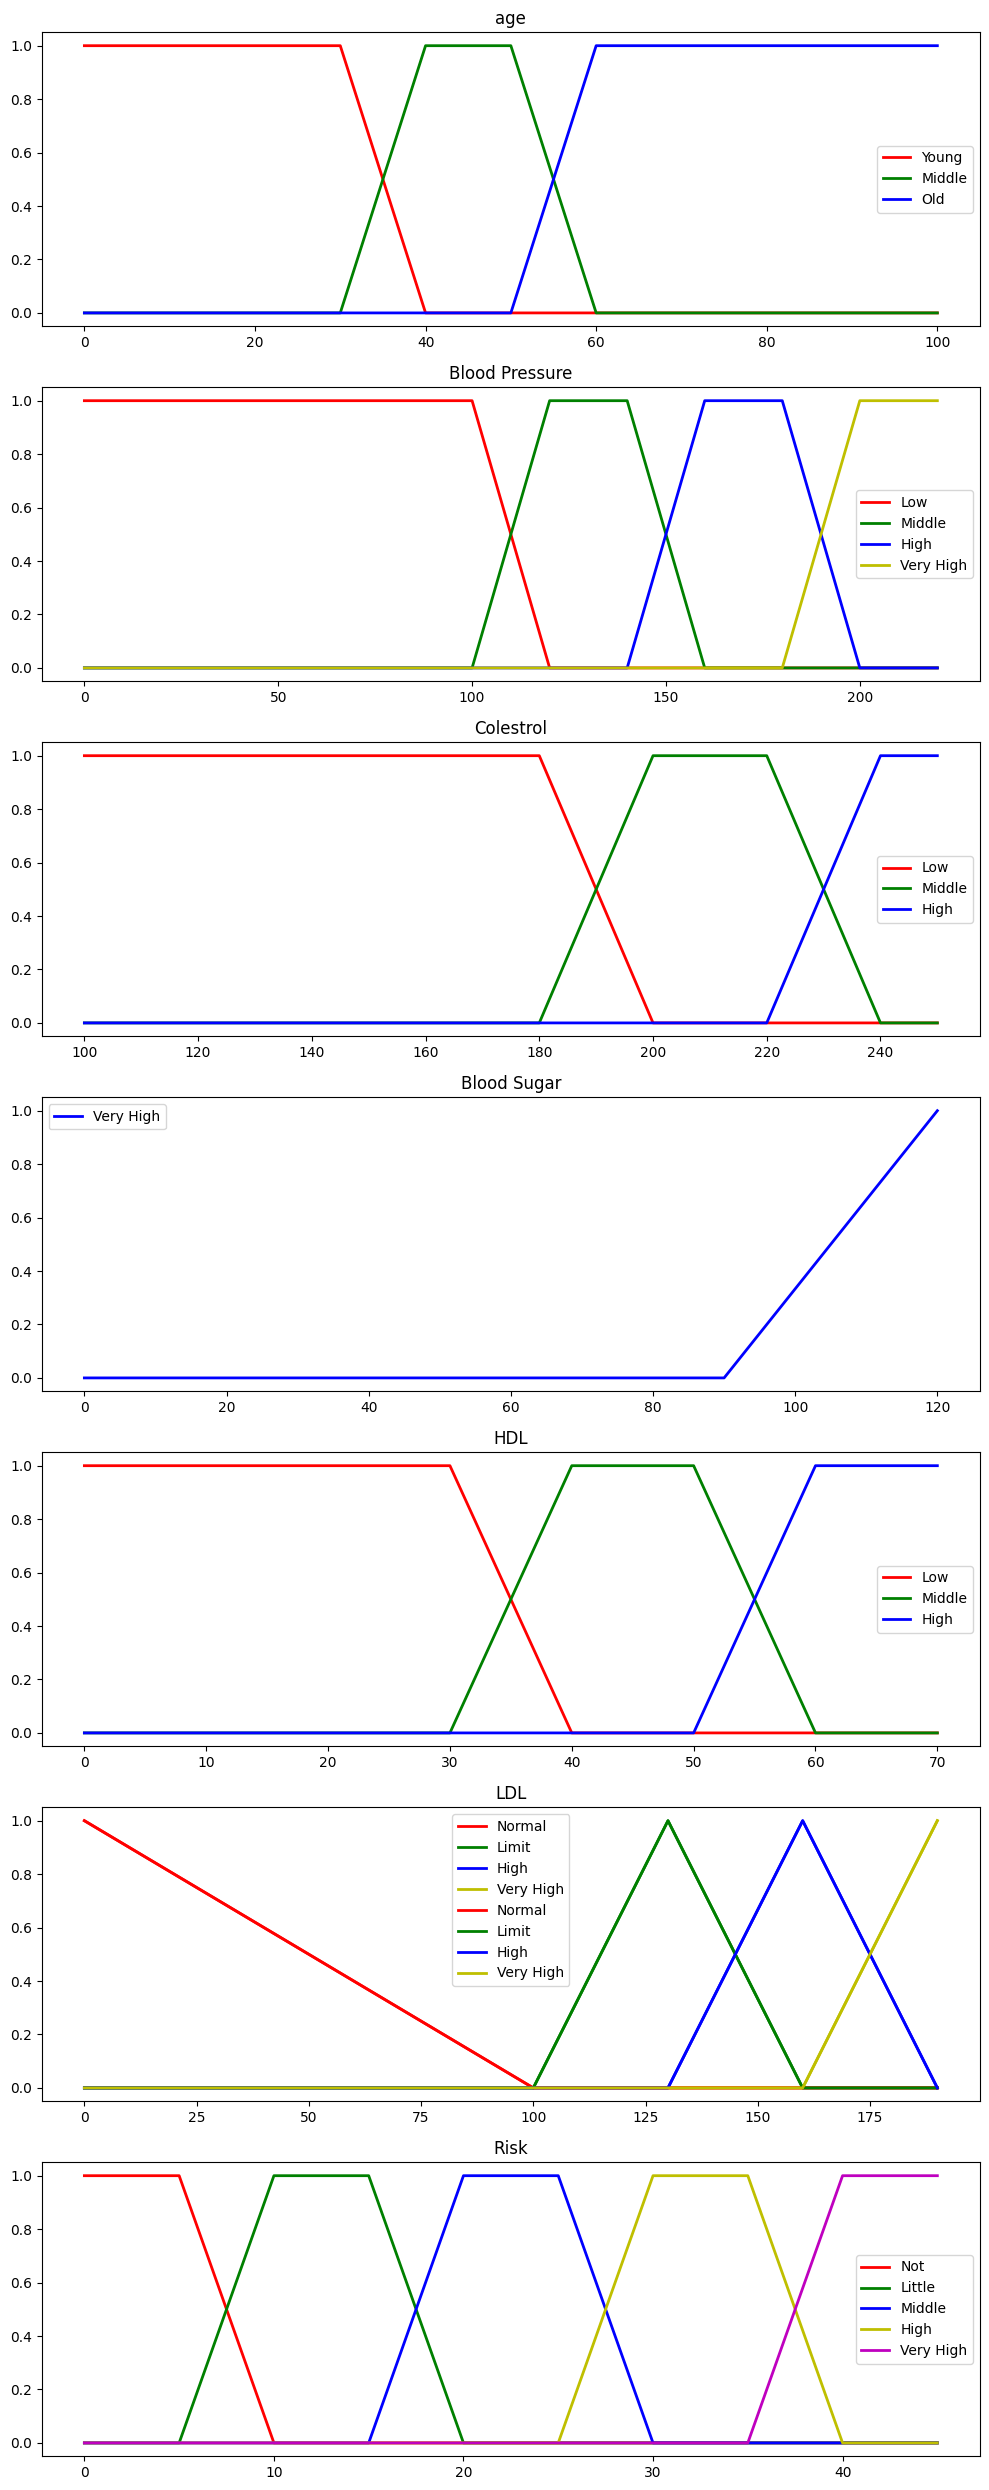

In [ ]:
# Grafik

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 7, figsize =(10, 25))

ax0.plot(x_age, age_young, 'r', linewidth = 2, label = 'Young')
ax0.plot(x_age, age_mid, 'g', linewidth = 2, label = 'Middle')
ax0.plot(x_age, age_old, 'b', linewidth = 2, label = 'Old')
ax0.set_title('age')
ax0.legend()

ax1.plot(x_bloodPressure, bloodPressure_low, 'r', linewidth = 2, label = 'Low')
ax1.plot(x_bloodPressure, bloodPressure_mid, 'g', linewidth = 2, label = 'Middle')
ax1.plot(x_bloodPressure, bloodPressure_high, 'b', linewidth = 2, label = 'High')
ax1.plot(x_bloodPressure, bloodPressure_veryHigh, 'y', linewidth = 2, label = 'Very High')
ax1.set_title('Blood Pressure')
ax1.legend()

ax2.plot(x_cholesterol, cholesterol_low, 'r', linewidth = 2, label = 'Low')
ax2.plot(x_cholesterol, cholesterol_mid, 'g', linewidth = 2, label = 'Middle')
ax2.plot(x_cholesterol, cholesterol_high, 'b', linewidth = 2, label = 'High')
ax2.set_title('Colestrol')
ax2.legend()

ax3.plot(x_bloodSugar, bloodSugar_veryHigh, 'b', linewidth = 2, label = 'Very High')
ax3.set_title('Blood Sugar')
ax3.legend()

ax4.plot(x_hdl, hdl_low, 'r', linewidth = 2, label = 'Low')
ax4.plot(x_hdl, hdl_mid, 'g', linewidth = 2, label = 'Middle')
ax4.plot(x_hdl, hdl_high, 'b', linewidth = 2, label = 'High')
ax4.set_title('HDL')
ax4.legend()

ax5.plot(x_ldl, ldl_normal, 'r', linewidth = 2, label = 'Normal')
ax5.plot(x_ldl, ldl_limit, 'g', linewidth = 2, label = 'Limit')
ax5.plot(x_ldl, ldl_high, 'b', linewidth = 2, label = 'High')
ax5.plot(x_ldl, ldl_veryHigh, 'y', linewidth = 2, label = 'Very High')
ax5.set_title('LDL')
ax5.legend()

ax5.plot(x_ldl, ldl_normal, 'r', linewidth = 2, label = 'Normal')
ax5.plot(x_ldl, ldl_limit, 'g', linewidth = 2, label = 'Limit')
ax5.plot(x_ldl, ldl_high, 'b', linewidth = 2, label = 'High')
ax5.plot(x_ldl, ldl_veryHigh, 'y', linewidth = 2, label = 'Very High')
ax5.set_title('LDL')
ax5.legend()

ax6.plot(y_risk, risk_not, 'r', linewidth = 2, label = 'Not')
ax6.plot(y_risk, risk_little, 'g', linewidth = 2, label = 'Little')
ax6.plot(y_risk, risk_mid, 'b', linewidth = 2, label = 'Middle')
ax6.plot(y_risk, risk_high, 'y', linewidth = 2, label = 'High')
ax6.plot(y_risk, risk_veryHigh, 'm', linewidth = 2, label = 'Very High')
ax6.set_title('Risk')
ax6.legend()

plt.tight_layout()

In [ ]:
# Üyelik dereceleri > BULANDIRMA

# knowledge
age_fit_young = fuzz.interp_membership(x_age, age_young, input_age)
age_fit_mid = fuzz.interp_membership(x_age, age_mid, input_age)
age_fit_old = fuzz.interp_membership(x_age, age_old, input_age)

bloodPressure_fit_low = fuzz.interp_membership(x_bloodPressure, bloodPressure_low, input_bloodPressure)
bloodPressure_fit_mid = fuzz.interp_membership(x_bloodPressure, bloodPressure_mid, input_bloodPressure)
bloodPressure_fit_high = fuzz.interp_membership(x_bloodPressure,bloodPressure_high , input_bloodPressure)
bloodPressure_fit_veryHigh = fuzz.interp_membership(x_bloodPressure, bloodPressure_veryHigh, input_bloodPressure)

cholesterol_fit_low = fuzz.interp_membership(x_cholesterol, cholesterol_low, input_cholesterol)
cholesterol_fit_mid = fuzz.interp_membership(x_cholesterol, cholesterol_mid, input_cholesterol)
cholesterol_fit_high = fuzz.interp_membership(x_cholesterol, cholesterol_high, input_cholesterol)

bloodSugar_fit_veryHigh = fuzz.interp_membership(x_bloodSugar, bloodSugar_veryHigh, input_bloodSugar)

ldl_fit_normal = fuzz.interp_membership(x_ldl, ldl_normal, input_ldl)
ldl_fit_limit = fuzz.interp_membership(x_ldl, ldl_limit, input_ldl)
ldl_fit_high = fuzz.interp_membership(x_ldl,ldl_high , input_ldl)
ldl_fit_veryHigh = fuzz.interp_membership(x_ldl, ldl_veryHigh, input_ldl)

hdl_fit_low = fuzz.interp_membership(x_hdl, hdl_low, input_hdl)
hdl_fit_mid = fuzz.interp_membership(x_hdl, hdl_mid, input_hdl)
hdl_fit_high = fuzz.interp_membership(x_hdl, hdl_high, input_hdl)

In [ ]:
# Kurallar

# rules eval
rule1 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_low ,cholesterol_fit_low),ldl_fit_normal), hdl_fit_high), risk_not)
rule2 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_low ,cholesterol_fit_low),ldl_fit_limit), hdl_fit_high), risk_little)
rule3 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_low ,cholesterol_fit_low),ldl_fit_high), hdl_fit_high), risk_mid)
rule4 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_low ,cholesterol_fit_low),ldl_fit_veryHigh), hdl_fit_high), risk_high)
rule5 = np.fmin(np.fmin(np.fmin(bloodPressure_fit_mid ,cholesterol_fit_low), hdl_fit_high), risk_not)

rule6 = np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_mid), cholesterol_fit_mid), risk_not)
rule7 = np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_mid), cholesterol_fit_mid), risk_not)
rule8 = np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_mid), cholesterol_fit_mid), risk_not)
rule9 = np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_high), cholesterol_fit_high), risk_mid)
rule10 = np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_high), cholesterol_fit_high), risk_high)
rule11 = np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_high), cholesterol_fit_high), risk_veryHigh)

rule12 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_mid), cholesterol_fit_low), ldl_fit_normal), hdl_fit_low), risk_not)
rule13 = np.fmin(np.fmin(age_fit_young, bloodSugar_fit_veryHigh), risk_little)
rule14 = np.fmin(np.fmin(age_fit_mid, bloodSugar_fit_veryHigh), risk_high)
rule15 = np.fmin(np.fmin(age_fit_old, bloodSugar_fit_veryHigh), risk_veryHigh)
rule16 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_low), cholesterol_fit_low), bloodSugar_fit_veryHigh), ldl_fit_normal), hdl_fit_high), risk_little)
rule17 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low), cholesterol_fit_low), bloodSugar_fit_veryHigh), ldl_fit_normal), hdl_fit_high), risk_high)
rule18 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_low), cholesterol_fit_low), bloodSugar_fit_veryHigh), ldl_fit_normal), hdl_fit_high), risk_veryHigh)
rule19 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low), cholesterol_fit_low), bloodSugar_fit_veryHigh), ldl_fit_veryHigh), hdl_fit_high), risk_veryHigh)

rule20 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_veryHigh, cholesterol_fit_high), ldl_fit_veryHigh), hdl_fit_high), risk_veryHigh)
rule21 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_high, cholesterol_fit_high), ldl_fit_high), hdl_fit_mid), risk_veryHigh)
rule22 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_veryHigh), cholesterol_fit_high), ldl_fit_veryHigh), hdl_fit_mid), risk_mid)
rule23 = np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_veryHigh), risk_veryHigh)
rule24 = np.fmin(np.fmin(age_fit_old, bloodPressure_fit_veryHigh), risk_veryHigh)

In [ ]:
# Birleşim kümeleri > ÇIKARTIM (Mamdani)

# inferensi
out_not = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule1,rule5),rule6),rule7),rule8),rule12)
out_little = np.fmax(np.fmax(rule2,rule13),rule16)
out_mid = np.fmax(np.fmax(rule3, rule9),rule22)
out_high = np.fmax(np.fmax(np.fmax(rule4, rule10),rule14),rule17)
out_veryHigh = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule11,rule15),rule18),rule19),rule20),rule21),rule23),rule24)

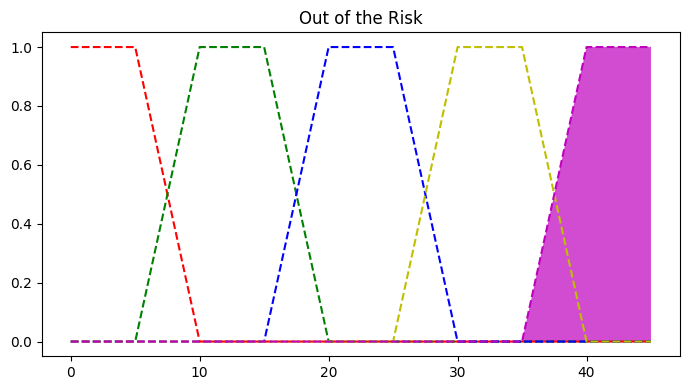

In [ ]:
# Grafik

risk0 = np.zeros_like(y_risk)

fig, ax0 = plt.subplots(figsize = (7, 4))
ax0.fill_between(y_risk, risk0, out_not, facecolor = 'r', alpha = 0.7)
ax0.plot(y_risk, risk_not, 'r', linestyle = '--')
ax0.fill_between(y_risk, risk0, out_little, facecolor = 'g', alpha = 0.7)
ax0.plot(y_risk, risk_little, 'g', linestyle = '--')
ax0.fill_between(y_risk, risk0, out_mid, facecolor = 'b', alpha = 0.7)
ax0.plot(y_risk, risk_mid, 'b', linestyle = '--')
ax0.fill_between(y_risk, risk0, out_high, facecolor = 'y', alpha = 0.7)
ax0.plot(y_risk, risk_high, 'y', linestyle = '--')
ax0.fill_between(y_risk, risk0, out_veryHigh, facecolor = 'm', alpha = 0.7)
ax0.plot(y_risk, risk_veryHigh, 'm', linestyle = '--')
ax0.set_title('Out of the Risk')

plt.tight_layout()

In [ ]:
# DURULAMA - CoA
# Output Value

# composisi
out_risk = np.fmax(np.fmax(np.fmax(np.fmax(out_not, out_little), out_mid), out_high), out_veryHigh)

defuzzified  = fuzz.defuzz(y_risk, out_risk, 'centroid')

result = fuzz.interp_membership(y_risk, out_risk, defuzzified)

print("Coroner Heart Diagnosis:", defuzzified)

Coroner Heart Diagnosis: 41.111111111111114


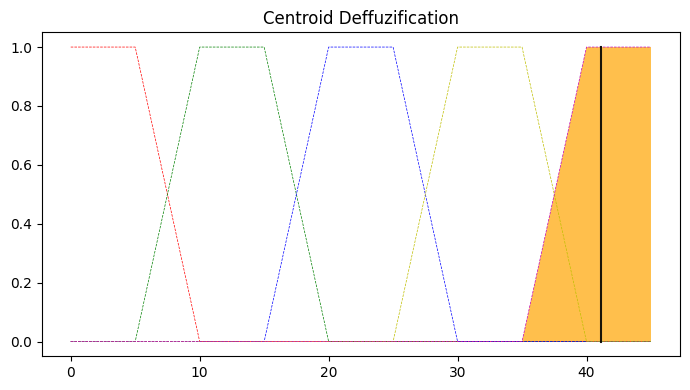

In [ ]:
# Grafik Output

fig, ax0 = plt.subplots(figsize=(7, 4))

ax0.plot(y_risk, risk_not, 'r', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_little, 'g', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_mid, 'b', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_high, 'y', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_veryHigh, 'm', linewidth = 0.5, linestyle = '--')

ax0.fill_between(y_risk, risk0, out_risk, facecolor = 'Orange', alpha = 0.7)
ax0.plot([defuzzified , defuzzified], [0, result], 'k', linewidth = 1.5, alpha = 0.9)
ax0.set_title('Centroid Deffuzification')

plt.tight_layout()